## Image Transformations
****

### Brightness & Contrast (Linear)

As you mentioned in Module 1, you can think of a (grayscale) image as a function:
$$ f: \mathbb{R}^2 \rightarrow \mathbb{R} $$
where 
$$ f(x,y) $$
gives the intensity at position 
$$ (x,y) $$

So you can transform the image by adjusted the function $f(x,y)$

A common approach is to adjust the intensity levels of the image using a linear scaling function:

$$
\text{output} = \alpha \times \text{input} + \beta 
$$

Where:
- $ \alpha $ is the gain or contrast control. Values $ > 1 $ increase contrast, and values between 0 and 1 decrease contrast.
- $ \beta $ is the bias or brightness control.


<b>Brightness</b>: This is the adjustment of the lightness or darkness of an image. An image's brightness can be increased by adding a constant to every pixel value of the image.   In terms of the line equation, this is similar to adjusting the y-intercept.


<b>Contrast:</b> This represents the difference between the darkest and lightest regions of an image. The contrast can be increased by multiplying every pixel value of the image by a constant.  In the line equation, this is similar to adjusting the slope.



First, let's translate the brightness and contrast formula to code.

In [34]:
# output = alpha * input + beta
# output = contrast * input + brightness

import numpy as np
import cv2
import matplotlib.pyplot as plt

def adjust_brightness_contrast(image_array, alpha, beta):

    #Convert to floating point.
    temp = image_array.astype('float32')

    #Contrast
    temp *= alpha
    # temp = temp * alpha

    #Brightness
    temp += beta

    # Clip values into 0-255 range
    temp = np.clip(temp, 0, 255)

    return temp.astype('uint8')

Next, let's import an image, convert it's colorspace to grayscale, and then plot it's histogram to analyze.

In [35]:
img = cv2.imread('../Graphics/face.png', 0)

Now let's send out image to our brightness and contrast function.

In [36]:
adjusted_image = adjust_brightness_contrast(img, 2, 0)

Let's plot our adjusted image and the orignal image with histograms.

In [37]:
adjust_hist = cv2.calcHist([adjusted_image],[0], None, [256], [0,255])
hist = cv2.calcHist([img], [0], None, [256], [0,255])

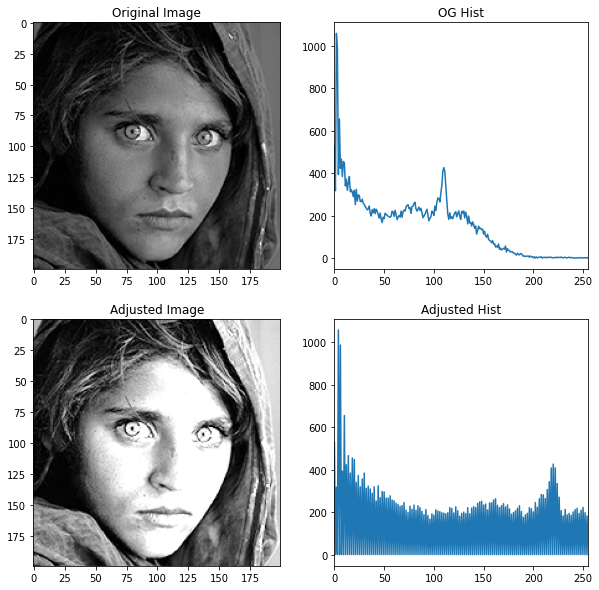

In [38]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(2,2,2)
plt.plot(hist)
plt.xlim([0,255])
plt.title('OG Hist')

plt.subplot(2,2,3)
plt.imshow(adjusted_image, cmap='gray')
plt.title('Adjusted Image')

plt.subplot(2,2,4)
plt.plot(adjust_hist)
plt.xlim([0,255])
plt.title('Adjusted Hist')

plt.tight_layout
plt.show()

### Gamma Correction (Non-Linear)

Gamma correction is used to adjust the brightness and contrast of digital images. It's a nonlinear operation that encodes and decodes luminance values in an image.

The formula for gamma correction is:

$$ O = I^\gamma $$

Where:
- $ O $ is the output pixel value after gamma correction.
- $ I $ is the normalized input pixel value, usually in the range [0, 1].
- $ \gamma $ is the gamma value.

Considering pixel values are typically in the range [0, 255], the formula can be expanded to:

$$ O = 255 \times \left(\frac{I}{255}\right)^\gamma $$

- If $\gamma < 1 $, the image is made brighter.
- If $ \gamma > 1 $, the image is made darker.


### Exercise 

**(1)** Use the image "lowcontrast.png" on Brightspace and create a histogram from the image data.  Then using either Brightness/Contrast or Gamma Correction stretch the image data to fit the whole tonal range from 0-255.   

**(2)**  Complete the same exercise with the image "lowcontrast_color.png".  

